In [2]:
!git clone https://github.com/DAIAD/data.git
!unzip data/swm_trialA_1k_clean.zip

Cloning into 'data'...
remote: Enumerating objects: 80, done.
remote: Total 80 (delta 0), reused 0 (delta 0), pack-reused 80 (from 1)
Receiving objects: 100% (80/80), 184.00 MiB | 19.38 MiB/s, done.
Resolving deltas: 100% (25/25), done.
Updating files: 100% (26/26), done.
Archive:  data/swm_trialA_1k_clean.zip
  inflating: swm_trialA_1k_clean.csv  
   creating: __MACOSX/
  inflating: __MACOSX/._swm_trialA_1k_clean.csv  


In [4]:
import pandas as pd

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [6]:
# Load the data
df = pd.read_csv('swm_trialA_1k_clean.csv' , sep=';')

df.rename(columns={'user.key': 'user_key',
                   'datetime': 'timestamp',
                   'meter.reading': 'meter_reading',
                   'diff': 'difference'}, inplace=True)

In [7]:
df.head()

,user_key,timestamp,meter_reading,difference
0,1c2c3f2d-c3ff-4487-b83c-6b9fce3818f5,19/05/2017 23:17:50,179015.0,2
1,1c2c3f2d-c3ff-4487-b83c-6b9fce3818f5,19/05/2017 22:17:50,179013.0,7
2,1c2c3f2d-c3ff-4487-b83c-6b9fce3818f5,19/05/2017 21:17:50,179006.0,0
3,1c2c3f2d-c3ff-4487-b83c-6b9fce3818f5,19/05/2017 20:17:50,179006.0,4
4,1c2c3f2d-c3ff-4487-b83c-6b9fce3818f5,19/05/2017 19:17:50,179002.0,9


In [8]:
df['user_key'].nunique()

1099

In [9]:
df['user_key'].value_counts()

user_key
77852396-f4a2-4d47-a864-8723417d9591    69706
c996d9cf-7826-4154-b141-e3e5e5a7b4aa    58428
c0e7463c-8ed6-49b3-b4fd-a69449d8cee5    20649
f12f91f7-81ca-4b7c-a5e8-3b81c4e5720b    20637
0d060044-7b49-4fb7-9ad1-bc0f959d88e1    20633
                                        ...  
52710543-ce2c-4e4b-80bd-84cca4010ddb       83
19423092-a8ea-404c-94aa-5c21f0c63197       59
c6bc6412-cdb2-495d-99d0-febe68b2c924       39
faa66978-4d58-43df-ae8f-fc2611c43264        7
54e5ebe6-72a3-404f-9f9e-9c7e3b8f306d        3
Name: count, Length: 1099, dtype: int64

In [10]:
one_user_data = df[df['user_key'] == '77852396-f4a2-4d47-a864-8723417d9591']

In [11]:
one_user_data

,user_key,timestamp,meter_reading,difference
16069398,77852396-f4a2-4d47-a864-8723417d9591,19/05/2017 23:59:00,7868.0,0
16069399,77852396-f4a2-4d47-a864-8723417d9591,19/05/2017 23:58:00,7868.0,0
16069400,77852396-f4a2-4d47-a864-8723417d9591,19/05/2017 23:57:00,7868.0,0
16069401,77852396-f4a2-4d47-a864-8723417d9591,19/05/2017 23:56:00,7868.0,0
16069402,77852396-f4a2-4d47-a864-8723417d9591,19/05/2017 23:55:00,7868.0,0
...,...,...,...,...
16139099,77852396-f4a2-4d47-a864-8723417d9591,12/01/2017 01:15:00,2546.0,0
16139100,77852396-f4a2-4d47-a864-8723417d9591,12/01/2017 01:00:00,2546.0,0
16139101,77852396-f4a2-4d47-a864-8723417d9591,12/01/2017 00:45:00,2546.0,0
16139102,77852396-f4a2-4d47-a864-8723417d9591,12/01/2017 00:30:00,2546.0,0


In [12]:
one_user_data.drop(columns=['user_key'], inplace=True)

/tmp/ipykernel_30/985255643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_user_data.drop(columns=['user_key'], inplace=True)


In [13]:
one_user_data

,timestamp,meter_reading,difference
16069398,19/05/2017 23:59:00,7868.0,0
16069399,19/05/2017 23:58:00,7868.0,0
16069400,19/05/2017 23:57:00,7868.0,0
16069401,19/05/2017 23:56:00,7868.0,0
16069402,19/05/2017 23:55:00,7868.0,0
...,...,...,...
16139099,12/01/2017 01:15:00,2546.0,0
16139100,12/01/2017 01:00:00,2546.0,0
16139101,12/01/2017 00:45:00,2546.0,0
16139102,12/01/2017 00:30:00,2546.0,0


In [14]:
one_user_data.iloc[69700:69706]

,timestamp,meter_reading,difference
16139098,12/01/2017 01:30:00,2546.0,0
16139099,12/01/2017 01:15:00,2546.0,0
16139100,12/01/2017 01:00:00,2546.0,0
16139101,12/01/2017 00:45:00,2546.0,0
16139102,12/01/2017 00:30:00,2546.0,0
16139103,12/01/2017 00:15:00,2546.0,0


In [15]:
one_user_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69706 entries, 16069398 to 16139103
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      69706 non-null  object 
 1   meter_reading  69706 non-null  float64
 2   difference     69706 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ MB


In [16]:
one_user_data['timestamp'] = pd.to_datetime(one_user_data['timestamp'], format='%d/%m/%Y %H:%M:%S')

/tmp/ipykernel_30/3075762036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_user_data['timestamp'] = pd.to_datetime(one_user_data['timestamp'], format='%d/%m/%Y %H:%M:%S')


In [17]:
one_user_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69706 entries, 16069398 to 16139103
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      69706 non-null  datetime64[ns]
 1   meter_reading  69706 non-null  float64       
 2   difference     69706 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.1 MB


In [18]:
# Set timestamp as index
one_user_data.set_index("timestamp", inplace=True)

In [19]:
one_user_data

,meter_reading,difference
timestamp,,
2017-05-19 23:59:00,7868.0,0
2017-05-19 23:58:00,7868.0,0
2017-05-19 23:57:00,7868.0,0
2017-05-19 23:56:00,7868.0,0
2017-05-19 23:55:00,7868.0,0
...,...,...
2017-01-12 01:15:00,2546.0,0
2017-01-12 01:00:00,2546.0,0
2017-01-12 00:45:00,2546.0,0


In [20]:
one_user_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69706 entries, 2017-05-19 23:59:00 to 2017-01-12 00:15:00
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   meter_reading  69706 non-null  float64
 1   difference     69706 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.6 MB


In [21]:
# Sort the data by timestamp (just in case it's not sorted)
one_user_data = one_user_data.sort_index()

# Filter the data for March 2017
march_data = one_user_data['2017-03-01':'2017-03-31']

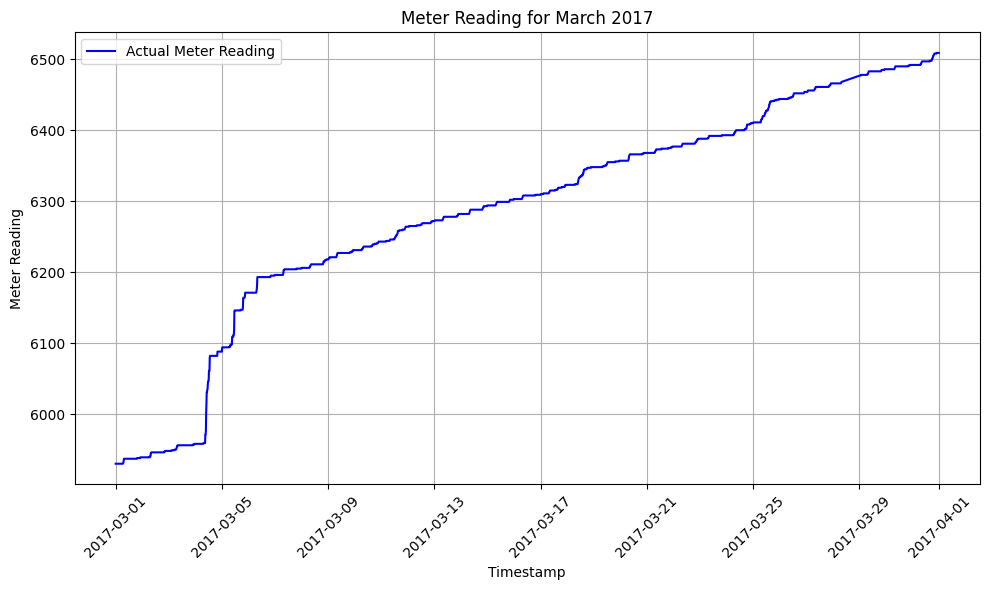

In [22]:
# Plot the meter_reading for March 2017
plt.figure(figsize=(10, 6))
plt.plot(march_data.index, march_data['meter_reading'], label='Actual Meter Reading', color='blue')
plt.title('Meter Reading for March 2017')
plt.xlabel('Timestamp')
plt.ylabel('Meter Reading')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
one_user_data.shape

(69706, 2)

In [24]:
69706 * 0.7

48794.2

In [25]:
# Split the data into training and testing sets
train_data = one_user_data[:50000]
test_data = one_user_data[50000:]

# Print the shapes of the splits to confirm
print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

Training data shape: (50000, 2)
Testing data shape: (19706, 2)


In [26]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize the training data
train_scaled = scaler.fit_transform(train_data['meter_reading'].values.reshape(-1, 1))

# Create lag features for training data
lags = 5
X_train, y_train = [], []
for i in range(lags, len(train_scaled)):
    X_train.append(train_scaled[i-lags:i].flatten())
    y_train.append(train_scaled[i])

X_train = np.array(X_train)
y_train = np.array(y_train)

# Reshape X_train for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Normalize the test data using the same scaler
test_scaled = scaler.transform(test_data['meter_reading'].values.reshape(-1, 1))

# Create lag features for test data
X_test = []
for i in range(lags, len(test_scaled)):
    X_test.append(test_scaled[i-lags:i].flatten())

X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))  # Output layer to predict the next meter_reading
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0354
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.4049e-05
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.5313e-05
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 7.7981e-06
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 9.3218e-06
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 9.3995e-06
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 9.6425e-06
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 9.8646e-06
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.5991e-05
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.1916e-05
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 5.6587e-06
Epoch 12/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 7.5372e-06
Epoch 13/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4.7886e-06
Epoch 14/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/s

In [28]:
# Make predictions for the test data
predictions_scaled = model.predict(X_test)

# Convert the predictions back to the original scale
predictions = scaler.inverse_transform(predictions_scaled)

# Actual meter readings for January 2017
actual = test_data['meter_reading'].iloc[lags:].values

616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [29]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate R² and RMSE
r2 = r2_score(actual, predictions.flatten())
rmse = np.sqrt(mean_squared_error(actual, predictions.flatten()))

# Print the results
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R²: 0.9989
RMSE: 3.6972


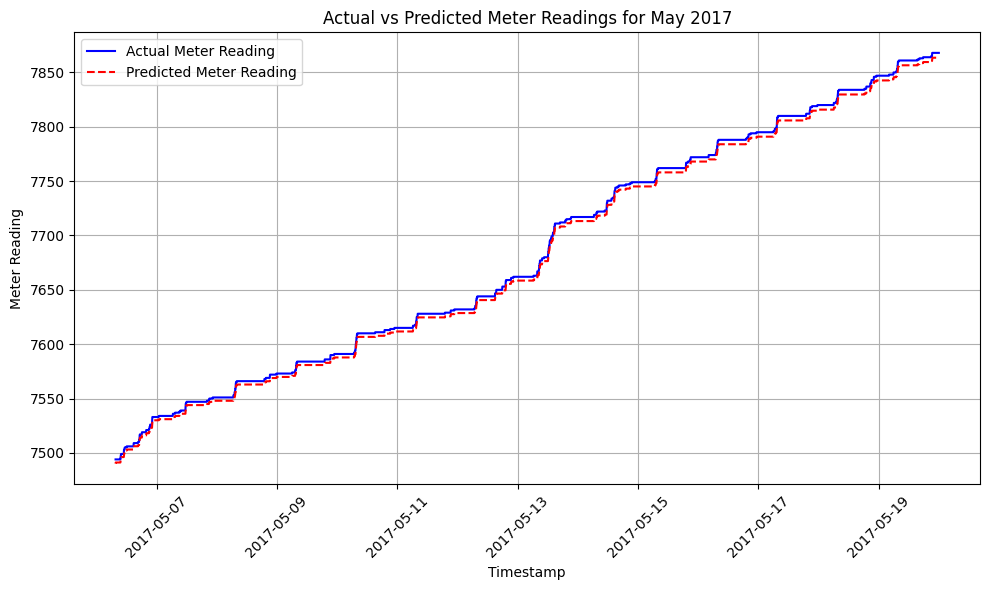

In [30]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values for May 2017
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[lags:], actual, label='Actual Meter Reading', color='blue')
plt.plot(test_data.index[lags:], predictions.flatten(), label='Predicted Meter Reading', color='red', linestyle='--')
plt.title('Actual vs Predicted Meter Readings for May 2017')
plt.xlabel('Timestamp')
plt.ylabel('Meter Reading')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
test_march_data = one_user_data['2017-03-01':'2017-03-31']

In [32]:
test_march_data

,meter_reading,difference
timestamp,,
2017-03-01 00:00:00,5930.0,1
2017-03-01 00:15:00,5930.0,0
2017-03-01 00:30:00,5930.0,0
2017-03-01 00:45:00,5930.0,0
2017-03-01 01:00:00,5930.0,0
...,...,...
2017-03-31 22:45:00,6509.0,0
2017-03-31 23:00:00,6509.0,0
2017-03-31 23:15:00,6509.0,0


In [33]:
# Normalize the test data using the same scaler
test_march_scaled = scaler.transform(test_march_data['meter_reading'].values.reshape(-1, 1))

# Create lag features for test data
X_test_march = []
for i in range(lags, len(test_march_scaled)):
    X_test_march.append(test_march_scaled[i-lags:i].flatten())

X_test_march = np.array(X_test_march)
X_test_march = X_test_march.reshape(X_test_march.shape[0], X_test_march.shape[1], 1)

In [34]:
# Make predictions for the test data
predictions_scaled = model.predict(X_test_march)

# Convert the predictions back to the original scale
predictions = scaler.inverse_transform(predictions_scaled)

# Actual meter readings for January 2017
actual = test_march_data['meter_reading'].iloc[lags:].values

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [35]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate R² and RMSE
r2 = r2_score(actual, predictions.flatten())
rmse = np.sqrt(mean_squared_error(actual, predictions.flatten()))

# Print the results
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R²: 0.9999
RMSE: 1.6859


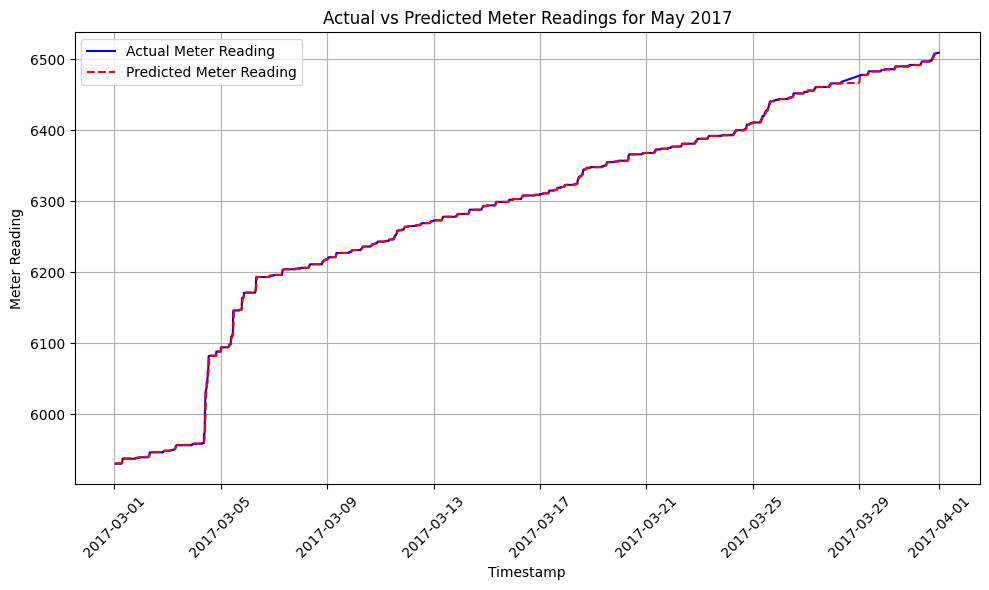

In [36]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values for January 2017
plt.figure(figsize=(10, 6))
plt.plot(test_march_data.index[lags:], actual, label='Actual Meter Reading', color='blue')
plt.plot(test_march_data.index[lags:], predictions.flatten(), label='Predicted Meter Reading', color='red', linestyle='--')
plt.title('Actual vs Predicted Meter Readings for May 2017')
plt.xlabel('Timestamp')
plt.ylabel('Meter Reading')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
one_week_test = one_user_data['2017-03-01':'2017-03-07']

In [38]:
one_week_test

,meter_reading,difference
timestamp,,
2017-03-01 00:00:00,5930.0,1
2017-03-01 00:15:00,5930.0,0
2017-03-01 00:30:00,5930.0,0
2017-03-01 00:45:00,5930.0,0
2017-03-01 01:00:00,5930.0,0
...,...,...
2017-03-07 22:45:00,6205.0,0
2017-03-07 23:00:00,6205.0,0
2017-03-07 23:15:00,6205.0,0


In [39]:
# Normalize the test data using the same scaler
test_week_scaled = scaler.transform(one_week_test['meter_reading'].values.reshape(-1, 1))

# Create lag features for test data
X_test_week = []
for i in range(lags, len(test_week_scaled)):
    X_test_week.append(test_week_scaled[i-lags:i].flatten())

X_test_week = np.array(X_test_week)
X_test_week = X_test_week.reshape(X_test_week.shape[0], X_test_week.shape[1], 1)

In [40]:
# Make predictions for the test data
predictions_scaled = model.predict(X_test_week)

# Convert the predictions back to the original scale
predictions = scaler.inverse_transform(predictions_scaled)

# Actual meter readings for January 2017
actual = one_week_test['meter_reading'].iloc[lags:].values

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [41]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate R² and RMSE
r2 = r2_score(actual, predictions.flatten())
rmse = np.sqrt(mean_squared_error(actual, predictions.flatten()))

# Print the results
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R²: 0.9991
RMSE: 3.2415


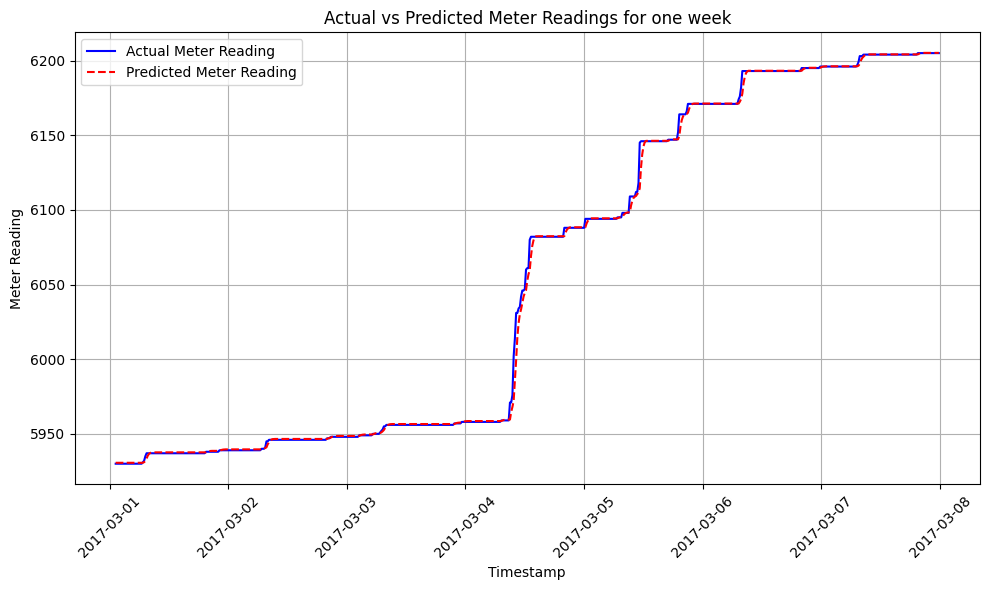

In [42]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values for January 2017
plt.figure(figsize=(10, 6))
plt.plot(one_week_test.index[lags:], actual, label='Actual Meter Reading', color='blue')
plt.plot(one_week_test.index[lags:], predictions.flatten(), label='Predicted Meter Reading', color='red', linestyle='--')
plt.title('Actual vs Predicted Meter Readings for one week')
plt.xlabel('Timestamp')
plt.ylabel('Meter Reading')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
# Parameters
n_timesteps = 10  # Adjust based on the model's training configuration

# Step 1: Extract the last n_timesteps from 'meter_reading'
last_data = one_user_data['meter_reading'][-n_timesteps:]  # Shape: (10,)

# Step 2: Reshape the data for LSTM input
input_sequence = np.array(last_data).reshape(1, n_timesteps, 1)  # Shape: (1, 10, 1)

In [44]:
# Step 3: Make predictions using the trained model
next_week_predictions = []
# Predict for each step in the future
for _ in range(7):  # Predict for 7 steps (1 week)
    next_pred = model.predict(input_sequence)  # Output shape: (1, 1)
    next_week_predictions.append(next_pred[0, 0])  # Extract scalar value

    # Update input_sequence by appending the new prediction
    next_pred_reshaped = np.expand_dims(next_pred, axis=-1)  # Shape: (1, 1, 1)
    input_sequence = np.append(input_sequence[:, 1:, :], next_pred_reshaped, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [45]:
# Step 4: Denormalize predictions (if scaling was applied)
predictions = scaler.inverse_transform(np.array(next_week_predictions).reshape(-1, 1))

# Step 5: Create timestamps for the next week
future_timestamps = pd.date_range(start=one_user_data.index[-1], periods=8, freq='D')[1:]

# Step 6: Combine predictions and timestamps into a DataFrame
forecast = pd.DataFrame({'timestamp': future_timestamps, 'predicted_meter_reading': predictions.flatten()})

In [46]:
# Display the forecast
print(forecast)

            timestamp  predicted_meter_reading
0 2017-05-20 23:59:00             23013.353516
1 2017-05-21 23:59:00             21692.072266
2 2017-05-22 23:59:00             22034.564453
3 2017-05-23 23:59:00             22361.880859
4 2017-05-24 23:59:00             22549.281250
5 2017-05-25 23:59:00             22574.304688
6 2017-05-26 23:59:00             22477.658203


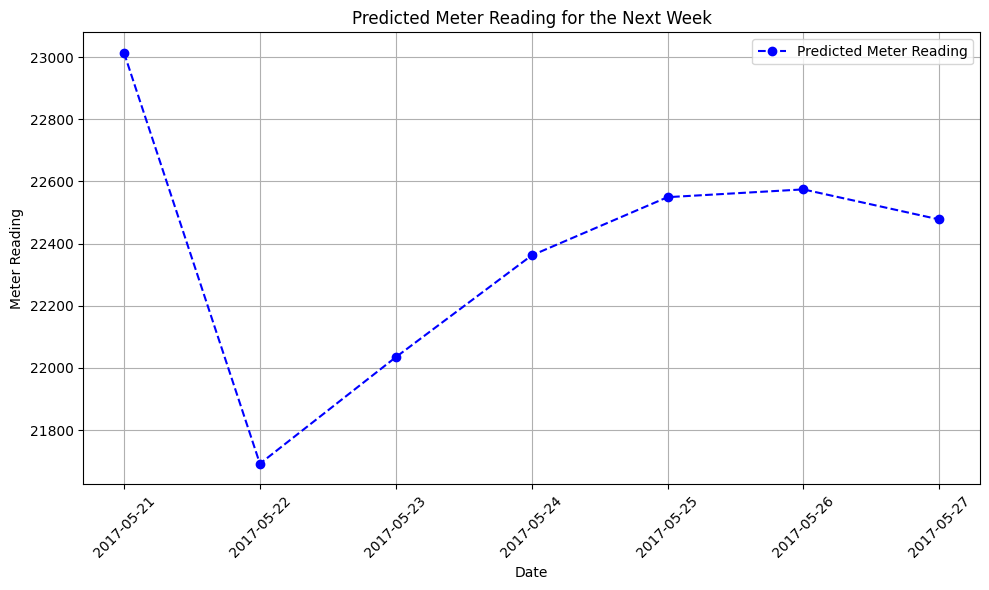

In [47]:
# Plot the forecasted data for the next week
plt.figure(figsize=(10, 6))
plt.plot(forecast['timestamp'], forecast['predicted_meter_reading'], label='Predicted Meter Reading', color='blue', linestyle='--', marker='o')

# Add titles and labels
plt.title('Predicted Meter Reading for the Next Week')
plt.xlabel('Date')
plt.ylabel('Meter Reading')
plt.xticks(rotation=45)

# Add grid, legend, and layout adjustments
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [48]:
model.save('forecasting_model.h5')

In [49]:
!pip install pyngrok

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [50]:
!ngrok config add-authtoken 23hnlTma9r1hTKDbZv8f5Hh4NxI_38HzDMRPjV1NF4JoaL344

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml                                


In [51]:
!pip install fastapi nest-asyncio uvicorn

In [89]:
from fastapi import FastAPI
from fastapi.middleware.cors import CORSMiddleware
import nest_asyncio
from pyngrok import ngrok
import uvicorn
from pydantic import BaseModel
from fastapi import HTTPException
import datetime

In [94]:
# FastAPI app setup
app = FastAPI()

In [95]:
one_user_data = one_user_data.copy()

In [104]:
one_user_data.head()

,meter_reading,difference
timestamp,,
2017-01-12 00:15:00,2546.0,0
2017-01-12 00:30:00,2546.0,0
2017-01-12 00:45:00,2546.0,0
2017-01-12 01:00:00,2546.0,0
2017-01-12 01:15:00,2546.0,0


In [ ]:
# Define the input data model
class PredictionRequest(BaseModel):
    days_to_predict: int  # Number of days to predict

@app.get("/")
def index():
    return {"message": "Welcome to the forecasting API!"}

@app.post("/predict")
async def predict(request: PredictionRequest):
    days_to_predict = request.days_to_predict

    # Parameters
    n_timesteps = 10  # Adjust based on the model's training configuration

    # Step 1: Extract the last n_timesteps from 'meter_reading'
    last_data = one_user_data['meter_reading'][-n_timesteps:]  # Shape: (10,)

    # Step 2: Reshape the data for LSTM input
    input_sequence = np.array(last_data).reshape(1, n_timesteps, 1)  # Shape: (1, 10, 1)

    # Step 3: Extract the last timestamp
    last_timestamp = one_user_data['timestamp'].iloc[-1]

    # Generate predictions for the specified number of days
    next_predictions = []
    future_timestamps = []  # List to hold future timestamps

    for i in range(days_to_predict):
        next_pred = model.predict(input_sequence)
        next_predictions.append(next_pred[0, 0])

        # Update the sequence with the new prediction
        next_pred_reshaped = np.expand_dims(next_pred, axis=-1)
        input_sequence = np.append(input_sequence[:, 1:, :], next_pred_reshaped, axis=1)

        # Increment the last timestamp by one day
        future_timestamps.append(last_timestamp + pd.Timedelta(days=i + 1))

    # Denormalize predictions (if scaling was applied)
    predictions = scaler.inverse_transform(np.array(next_predictions).reshape(-1, 1))

    # Prepare the response
    forecast_data = {
        "predictions": predictions.flatten().tolist(),
        "timestamps": [timestamp.strftime("%Y-%m-%d") for timestamp in future_timestamps],
    }

    return forecast_data

In [ ]:
# Set up the FastAPI app to run on a public URL via ngrok
port = 8004
ngrok_tunnel = ngrok.connect(port)
print(f"Public URL: {ngrok_tunnel.public_url}")

nest_asyncio.apply()
uvicorn.run(app, port=port)

Public URL: https://24ae-34-40-149-146.ngrok-free.app


INFO:     Started server process [30]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8004 (Press CTRL+C to quit)


INFO:     160.176.8.200:0 - "GET / HTTP/1.1" 200 OK
INFO:     160.176.8.200:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     160.176.8.200:0 - "GET / HTTP/1.1" 200 OK
INFO:     160.176.8.200:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     160.176.8.200:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     160.176.8.200:0 - "POST /predict HTTP/1.1" 500 Internal Server Error


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'timestamp'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/uvicorn/protocols/http/httptools_impl.py", line 399, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
  File "/opt/conda/lib/python3.10/site-packages/uvicorn/middleware/proxy_headers.py", line 70, in __call__
 